In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import scipy.stats as st
from scipy.stats import normaltest, skewtest, probplot, boxcox

In [3]:
import pyodbc 
server = '10.46.64.155' 
database = 'DRPZ_ReportsDB' 
username = 'Shiryaeva_EI' 
password = 'Rosbank11348' 

cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


In [4]:
stmt = "SELECT * FROM esh.test_cbr_influence_6months where exec_month >= '2018-01-01' and exec_month < '2018-04-01' " 
# stmt = "SELECT * FROM dbo.boo_filials_new " 
df = pd.read_sql_query(stmt, cnxn)
 
df.head(5) 



,ac13_orig,ptdtn,ac13,yr_ptdtn,exec_month,boo_name,ar_agent_group_name,bucket,bankrot,prod_type,...,coll_total_4,ar_agent_group_name_4,bailiff_5,var_5,coll_total_5,ar_agent_group_name_5,bailiff_6,var_6,coll_total_6,ar_agent_group_name_6
0,7360198261200,2013-12-21,9631Q28394200,y2013,2018-02-01,Владимир,ExternalAgencies,720+,0,Consumer,...,0.0,Internal Hard,bailiff,443407.31,0.0,Internal Hard,bailiff,443407.31,0.0,Internal Hard
1,4951X35604202,2012-10-29,8770N46662200,<2013,2018-02-01,Калуга,Internal Hard,361-720,0,Cards/Revolving,...,0.0,Internal Hard,court,334550.99,0.0,HCC,court,334550.99,0.0,HCC
2,9659366391200,2011-06-10,9659366391200,<2013,2018-02-01,Москва (вне групп),Internal Hard,720+,0,Cars,...,0.0,Internal Hard,other,1031227.27,0.0,Internal Hard,bailiff,1031227.27,0.0,Internal Hard
3,5395763625200,2014-09-25,7466007525200,y2014,2018-02-01,Кемерово,HCC,181-360,0,Consumer,...,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None
4,7500316512200,2011-12-21,7500316512200,<2013,2018-02-01,Красноярск,Internal Hard,720+,0,PRO Legal Entities,...,0.0,Internal Hard,court,2278581.20,0.0,Internal Hard,court,2260734.95,0.0,Internal Hard


In [5]:
df.describe()

,bankrot,flag_cess,var,cnt,coll_total,ptsum,cnt_loans,SRC_STM_ID,var_1,coll_total_1,var_2,coll_total_2,var_3,coll_total_3,var_4,coll_total_4,var_5,coll_total_5,var_6,coll_total_6
count,218291.000000,46836.0,1.893650e+05,189365.000000,2.182910e+05,2.182910e+05,218291.000000,218291.000000,1.869800e+05,2.142340e+05,1.843530e+05,2.104870e+05,1.831110e+05,2.065410e+05,1.810550e+05,2.030490e+05,1.813970e+05,1.994010e+05,1.810110e+05,1.959790e+05
mean,0.033098,1.0,3.862319e+05,0.997053,4.049899e+03,5.079470e+05,1.785291,7.949004,3.911190e+05,3.283141e+03,3.975987e+05,3.238149e+03,4.013149e+05,3.363835e+03,4.077598e+05,2.914275e+03,4.130941e+05,2.996575e+03,4.202040e+05,2.983147e+03
std,0.178893,0.0,6.946653e+05,0.054495,7.766855e+04,6.342765e+05,1.324437,5.892990,7.050476e+05,6.854201e+04,7.144811e+05,6.363607e+04,7.188037e+05,7.427065e+04,7.231940e+05,6.860043e+04,7.267375e+05,6.046224e+04,7.296529e+05,6.053289e+04
min,0.000000,1.0,0.000000e+00,0.000000,-1.791839e+05,0.000000e+00,1.000000,4.000000,0.000000e+00,-1.791839e+05,0.000000e+00,-2.314000e+05,0.000000e+00,-2.314000e+05,0.000000e+00,-2.314000e+05,0.000000e+00,-5.790843e+05,0.000000e+00,-5.790843e+05
25%,0.000000,1.0,8.995857e+04,1.000000,0.000000e+00,2.000000e+05,1.000000,4.000000,9.275526e+04,0.000000e+00,9.698282e+04,0.000000e+00,9.888702e+04,0.000000e+00,1.035234e+05,0.000000e+00,1.073780e+05,0.000000e+00,1.122772e+05,0.000000e+00
50%,0.000000,1.0,2.390500e+05,1.000000,0.000000e+00,3.840000e+05,1.000000,7.000000,2.444828e+05,0.000000e+00,2.512819e+05,0.000000e+00,2.553478e+05,0.000000e+00,2.626322e+05,0.000000e+00,2.685158e+05,0.000000e+00,2.760583e+05,0.000000e+00
75%,0.000000,1.0,4.813596e+05,1.000000,0.000000e+00,6.000000e+05,2.000000,8.000000,4.867478e+05,0.000000e+00,4.928006e+05,0.000000e+00,4.973861e+05,0.000000e+00,5.043526e+05,0.000000e+00,5.105370e+05,0.000000e+00,5.189658e+05,0.000000e+00
max,1.000000,1.0,3.458626e+07,2.000000,1.691448e+07,3.360000e+07,25.000000,24.000000,3.496522e+07,1.691448e+07,3.496522e+07,1.691448e+07,3.496522e+07,2.530210e+07,3.447248e+07,2.530210e+07,3.495978e+07,1.331822e+07,3.495978e+07,1.331822e+07


In [6]:
df["bailiff_len"] = np.where(df["bailiff"] == df["bailiff_1"], 1, 0) + np.where(df["bailiff"] == df["bailiff_2"], 1, 0) 
+  np.where(df["bailiff"] == df["bailiff_3"], 1, 0) + np.where(df["bailiff"] == df["bailiff_4"], 1, 0) 
+     np.where(df["bailiff"] == df["bailiff_5"], 1, 0) + np.where(df["bailiff"] == df["bailiff_6"], 1, 0)
    
df["ar_agent_group_name_len"] = np.where(df["ar_agent_group_name"] == df["ar_agent_group_name_1"], 1, 0) 
+ np.where(df["ar_agent_group_name"] == df["ar_agent_group_name_2"], 1, 0) 
+  np.where(df["ar_agent_group_name"] == df["ar_agent_group_name_3"], 1, 0) 
+ np.where(df["ar_agent_group_name"] == df["ar_agent_group_name_4"], 1, 0) 
+     np.where(df["ar_agent_group_name"] == df["ar_agent_group_name_5"], 1, 0) 
+ np.where(df["ar_agent_group_name"] == df["ar_agent_group_name_6"], 1, 0)
    

array([0, 0, 1, ..., 1, 0, 1])

In [16]:
df["bankrot"] = df["bankrot"].astype("object")
df["flag_cess"] = df["flag_cess"].fillna(0).astype("object")
df["ptdtk"] = df["ptdtk"].apply(pd.to_datetime)
df["SRC_STM_ID"] = df["SRC_STM_ID"].astype("object")
df["var"] = df["var"].fillna(0)

In [17]:
df["is_over"] = (df["exec_month"]> df["ptdtk"] ).astype("int").fillna(0).astype("object")
df["duty_of_ptsum"] = np.where(df["ptsum"] > 0, (df["var"] / df["ptsum"]).fillna(0), 0)

In [30]:
var_var = ['var_%s' % i for i in range(1, 7)]
var_coll_total = ['coll_total_%s' % i for i in range(1, 7)]
var_cbr = ['cbr_%s' % i for i in range(1, 7)]
var_bailiff = ['bailiff_%s' % i for i in range(1, 7)]
var_ar_agent_group_name = ['ar_agent_group_name_%s' % i for i in range(1, 7)]

In [26]:
i = 0 

while i < 6 : 
    df[var_cbr[i]] = np.where(df[var_var[i]] > 0.01, 
                              np.where(df[var_coll_total[i]] > 0, df[var_coll_total[i]], 0) / df[var_var[i]] , 0) 
    i += 1

df["cbr"] = np.where(df["var"] > 0.01, 
                              np.where(df["coll_total"] > 0, df["coll_total"], 0) / df["var"] , 0) 

In [27]:
df.at[df["boo_name"].isin(['Амур', 'Владивосток', 'Камчатка','Сахалин', 'Хабаровск','Якутия']), "macroregion"]="Дальневосточный"
df.at[df["boo_name"].isin(['Восточный (Москва)','Западный (Москва)','Москва (вне групп)','Москва (Подмосковье)',
                          'Северный (Москва)']), "macroregion"]="Москва"
df.at[df["boo_name"].isin(['Екатеринбург','Казань (LB)','Нижний Новгород','Пермь','Самара','Саратов',
    'Тюмень','Уфа (LB)','Челябинск']), "macroregion"]="Дальневосточный"
df.at[df["boo_name"].isin(['Владимир','Калининград','Санкт-Петербург','Северо-Западный','Ярославль (LB)']), "macroregion"]="Северо-Западный"
df.at[df["boo_name"].isin(['Барнаул','Дудинка-Норильск','Иркутск','Кемерово','Красноярск',
                          'Кызыл','Новосибирск','Омск','Томск','Улан-Удэ','Чита']), "macroregion"]="Сибирский"
df.at[df["boo_name"].isin(['Астрахань','Волгоград','Калуга','Кубань','Курск','Липецк (LB)',
                          'Ростов-на-Дону']), "macroregion"]="Южный" 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218291 entries, 0 to 218290
Data columns (total 60 columns):
ac13_orig                  218291 non-null object
ptdtn                      218291 non-null datetime64[ns]
ac13                       218291 non-null object
yr_ptdtn                   218291 non-null object
exec_month                 218291 non-null datetime64[ns]
boo_name                   218291 non-null object
ar_agent_group_name        218291 non-null object
bucket                     218291 non-null object
bankrot                    218291 non-null object
prod_type                  218291 non-null object
b720                       218291 non-null object
bailiff                    218291 non-null object
flag_cess                  218291 non-null object
var                        218291 non-null float64
cnt                        189365 non-null float64
coll_total                 218291 non-null float64
COLLATERAL                 218291 non-null object
ptdtk               

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218291 entries, 0 to 218290
Data columns (total 54 columns):
yr_ptdtn                   218291 non-null object
boo_name                   218291 non-null object
ar_agent_group_name        218291 non-null object
bucket                     218291 non-null object
bankrot                    218291 non-null object
prod_type                  218291 non-null object
b720                       218291 non-null object
bailiff                    218291 non-null object
flag_cess                  218291 non-null object
var                        189365 non-null float64
COLLATERAL                 218291 non-null object
ptdtk                      218287 non-null datetime64[ns]
rb_name                    218291 non-null object
product_eng8               218291 non-null object
ptsum                      218291 non-null float64
cnt_loans                  218291 non-null int64
ptusr17                    218291 non-null object
SRC_STM_ID                 218

In [51]:
np.append(np.ravel([ var_var, var_coll_total,var_bailiff, var_ar_agent_group_name ]), 
         ["ac13_orig", "ptdtn", 'ac13', 'exec_month', 'coll_total', 'cnt', 'ptdtk', 'rb_name'])

array(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'coll_total_1', 'coll_total_2', 'coll_total_3', 'coll_total_4',
       'coll_total_5', 'coll_total_6', 'bailiff_1', 'bailiff_2',
       'bailiff_3', 'bailiff_4', 'bailiff_5', 'bailiff_6',
       'ar_agent_group_name_1', 'ar_agent_group_name_2',
       'ar_agent_group_name_3', 'ar_agent_group_name_4',
       'ar_agent_group_name_5', 'ar_agent_group_name_6', 'ac13_orig',
       'ptdtn', 'ac13', 'exec_month', 'coll_total', 'cnt', 'ptdtk',
       'rb_name'], dtype='<U21')

In [53]:
data = df.copy()
cols = np.append(np.ravel([ var_var, var_coll_total,var_bailiff, var_ar_agent_group_name ]), 
         ["ac13_orig", "ptdtn", 'ac13', 'exec_month', 'coll_total', 'cnt', 'ptdtk', 'rb_name'])
data = data.drop(columns=cols)
data.head(5)

,yr_ptdtn,boo_name,ar_agent_group_name,bucket,bankrot,prod_type,b720,bailiff,flag_cess,var,...,is_over,duty_of_ptsum,cbr_1,cbr_2,cbr_3,cbr_4,cbr_5,cbr_6,cbr,macroregion
0,y2013,Владимир,ExternalAgencies,720+,0,Consumer,720b2,other,1,0.00,...,1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Северо-Западный
1,<2013,Калуга,Internal Hard,361-720,0,Cards/Revolving,361-720,bailiff,0,334550.99,...,1,1.115170,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Южный
2,<2013,Москва (вне групп),Internal Hard,720+,0,Cars,720b5,other,0,1031227.27,...,1,1.559444,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Москва
3,y2014,Кемерово,HCC,181-360,0,Consumer,181-360,court,0,152259.13,...,1,0.699815,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Сибирский
4,<2013,Красноярск,Internal Hard,720+,0,PRO Legal Entities,720b3,court,0,2113773.15,...,1,0.418569,0.044404,0.0,0.043221,0.0,0.0,0.0,0.0,Сибирский


In [54]:
y = pd.DataFrame(np.where(df["var"] == 0, 0, (df['coll_total'] / df['var']).fillna(0)))
y

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [57]:
categorical = []
numerical = []

for feature in data.columns:
    if data[feature].dtype == object :
        categorical.append(feature)
    else : 
        numerical.append(feature)

In [59]:
data[numerical].describe()

,var,ptsum,cnt_loans,bailiff_len,ar_agent_group_name_len,duty_of_ptsum,cbr_1,cbr_2,cbr_3,cbr_4,cbr_5,cbr_6,cbr
count,2.182910e+05,2.182910e+05,218291.000000,218291.000000,218291.000000,2.182910e+05,218291.000000,218291.000000,218291.000000,218291.000000,218291.000000,218291.000000,218291.000000
mean,3.350519e+05,5.079470e+05,1.785291,1.747617,0.933364,1.417076e+03,0.013486,0.012034,0.011555,0.010151,0.009711,0.009138,0.026851
std,6.601235e+05,6.342765e+05,1.324437,0.599236,0.249391,2.519815e+05,0.140157,0.124399,0.087963,0.127150,0.130696,0.124927,2.534144
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.452717e+04,2.000000e+05,1.000000,2.000000,1.000000,2.592671e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.851101e+05,3.840000e+05,1.000000,2.000000,1.000000,6.690722e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.311707e+05,6.000000e+05,2.000000,2.000000,1.000000,9.884218e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.458626e+07,3.360000e+07,25.000000,2.000000,1.000000,6.250848e+07,45.516240,45.516240,18.027422,48.323619,48.323619,48.323619,1173.306773


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000035D22E10>,
      dtype=object)

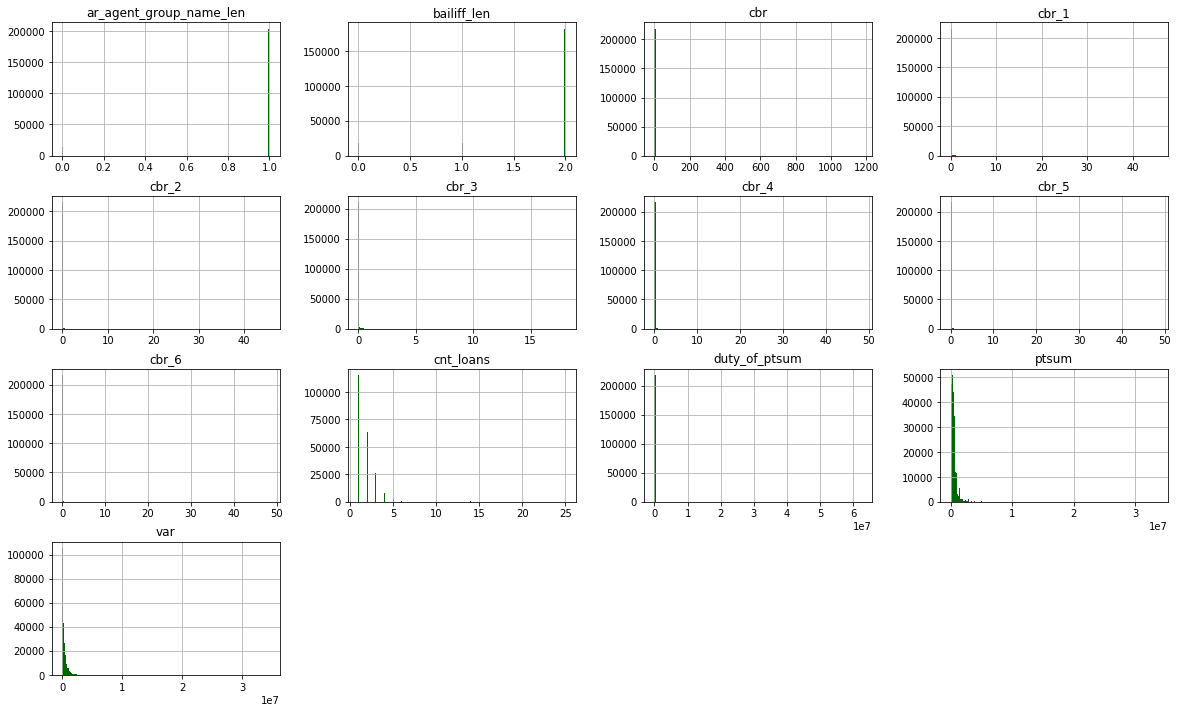

In [60]:
data[numerical].hist(figsize=(20,12), bins=200, color='darkgreen')

IndexError: index 3 is out of bounds for axis 0 with size 3

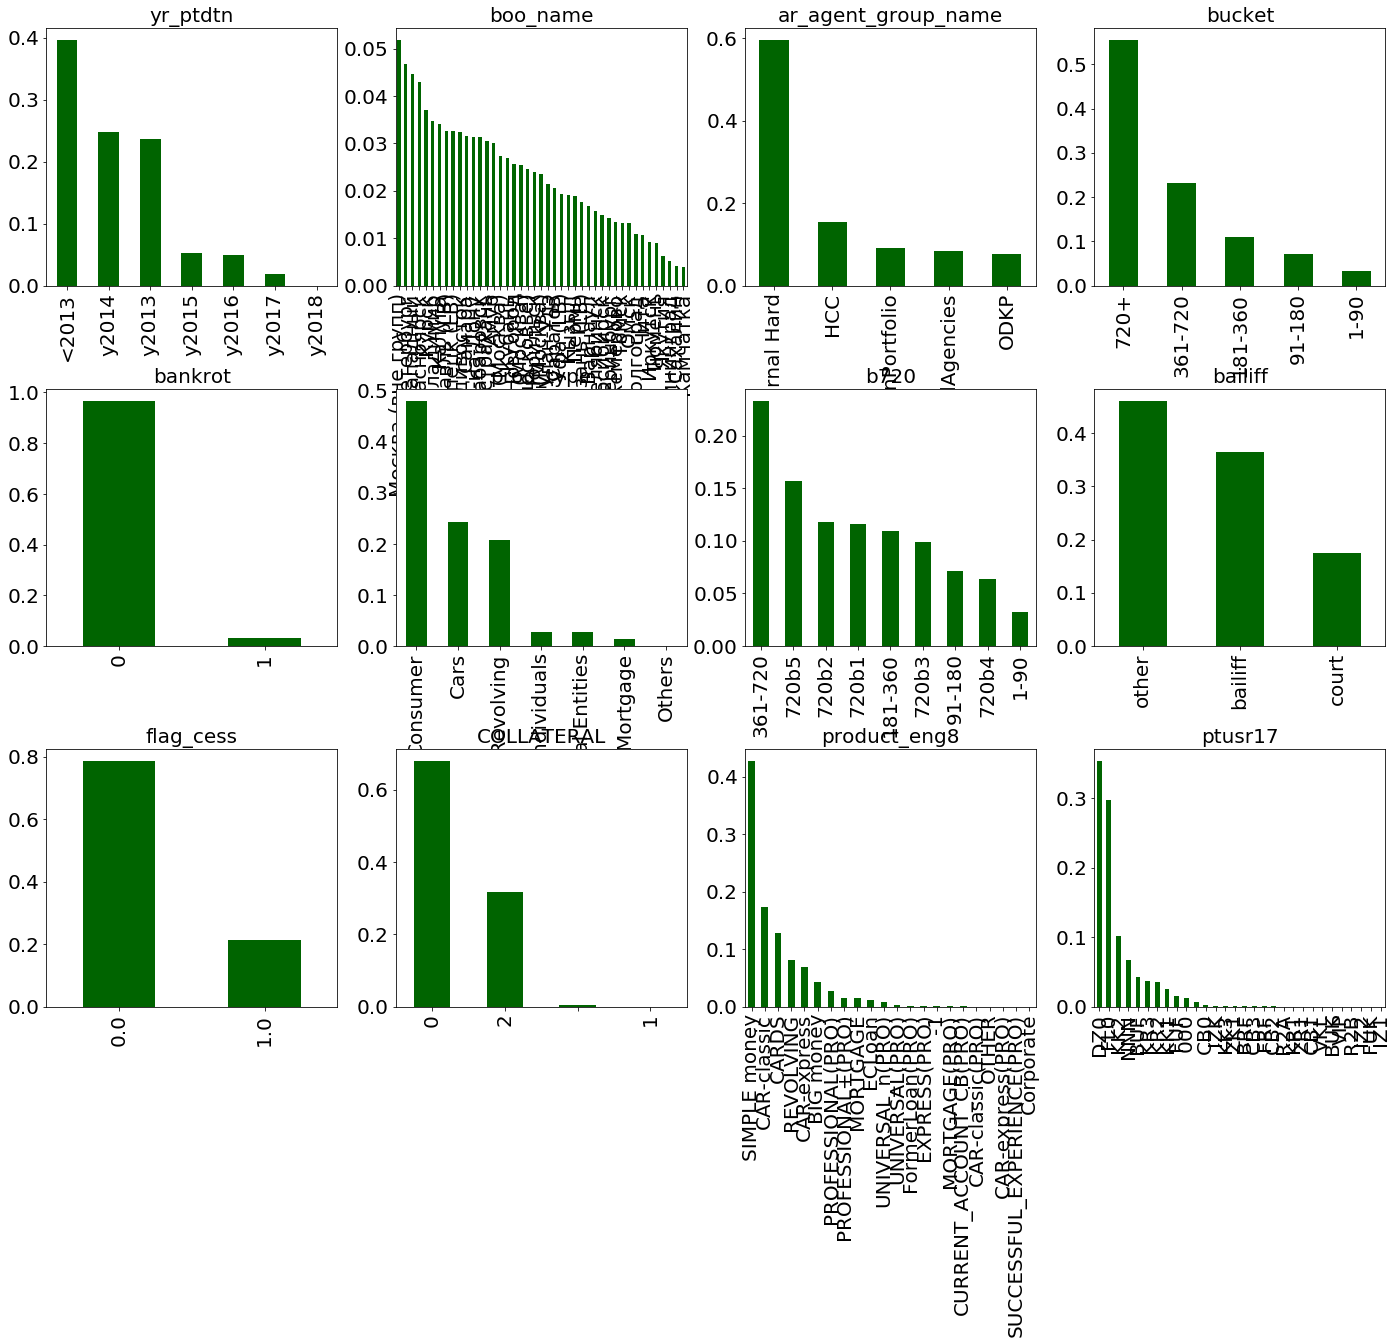

In [61]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    data[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='darkgreen')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()

In [62]:
correlation_table  = data[numerical].corr()
correlation_table

,var,ptsum,cnt_loans,bailiff_len,ar_agent_group_name_len,duty_of_ptsum,cbr_1,cbr_2,cbr_3,cbr_4,cbr_5,cbr_6,cbr
var,1.000000,0.550242,0.005935,-0.000924,0.084147,0.000969,-0.029540,-0.028704,-0.038967,-0.024311,-0.022288,-0.021844,-0.003034
ptsum,0.550242,1.000000,0.014238,-0.015462,0.024416,-0.004502,0.000737,0.001816,0.002478,-0.001163,-0.001363,-0.000178,-0.002049
cnt_loans,0.005935,0.014238,1.000000,0.038177,0.028541,-0.000391,-0.019631,-0.017840,-0.023673,-0.013358,-0.011378,-0.011743,-0.003066
bailiff_len,-0.000924,-0.015462,0.038177,1.000000,0.311440,0.002367,0.011030,0.011295,0.011808,0.006001,0.007124,0.006229,0.001485
ar_agent_group_name_len,0.084147,0.024416,0.028541,0.311440,1.000000,0.001502,0.015981,0.010614,0.012206,0.005660,0.005064,0.006016,0.001973
duty_of_ptsum,0.000969,-0.004502,-0.000391,0.002367,0.001502,1.000000,-0.000541,-0.000544,-0.000613,-0.000362,-0.000333,-0.000262,-0.000060
cbr_1,-0.029540,0.000737,-0.019631,0.011030,0.015981,-0.000541,1.000000,0.089412,0.115671,0.056765,0.038274,0.035744,0.008796
cbr_2,-0.028704,0.001816,-0.017840,0.011295,0.010614,-0.000544,0.089412,1.000000,0.118146,0.055474,0.044801,0.034590,0.007733
cbr_3,-0.038967,0.002478,-0.023673,0.011808,0.012206,-0.000613,0.115671,0.118146,1.000000,0.099770,0.072778,0.057480,0.007701
cbr_4,-0.024311,-0.001163,-0.013358,0.006001,0.005660,-0.000362,0.056765,0.055474,0.099770,1.000000,0.062133,0.045189,0.020347


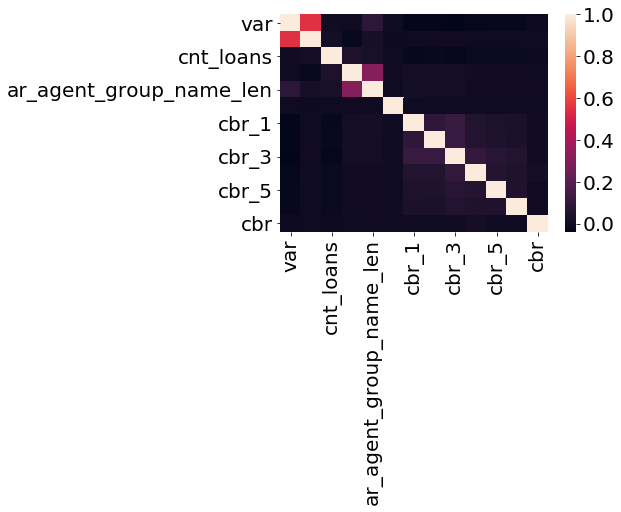

In [63]:
sns.heatmap(correlation_table)

""


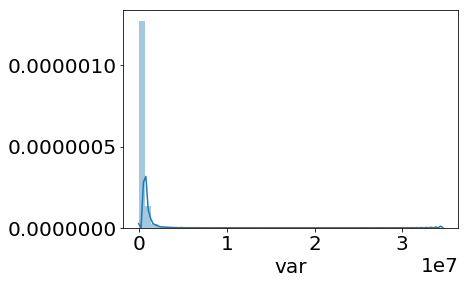

In [64]:
sns.distplot(data["var"].fillna(0))

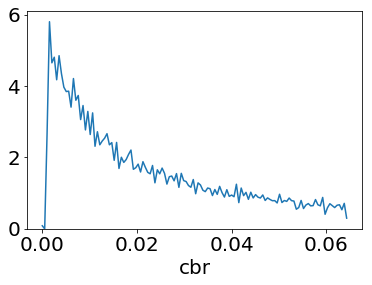

In [65]:
df["cbr"].quantile(0.05)

data = df[(df["cbr"]>=df["cbr"].quantile(0.05))&(df["cbr"]<=df["cbr"].quantile(0.95))]
sns.distplot( data["cbr"],hist=False)

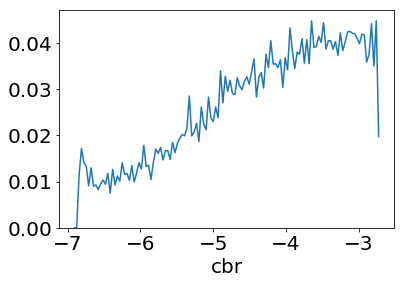

In [66]:
sns.distplot(np.log(data["cbr"]+0.001), hist=False)


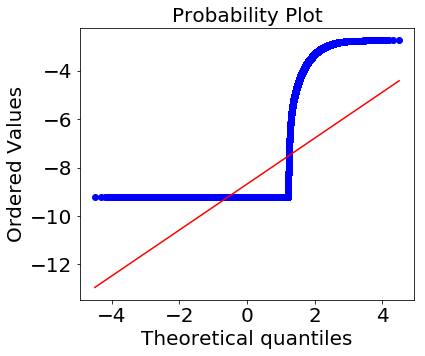

In [67]:
plt.figure(figsize=(6, 5))
st.probplot(np.log(data["cbr"] + 0.0001), dist="norm", plot=plt);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


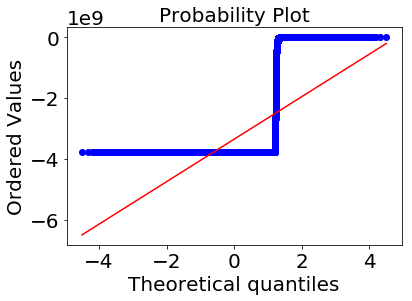

In [68]:
data['bc_cbr'], bc_lmbda = boxcox(data['cbr'] + 0.001)

st.probplot(data['bc_cbr'], dist="norm", plot=plt);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


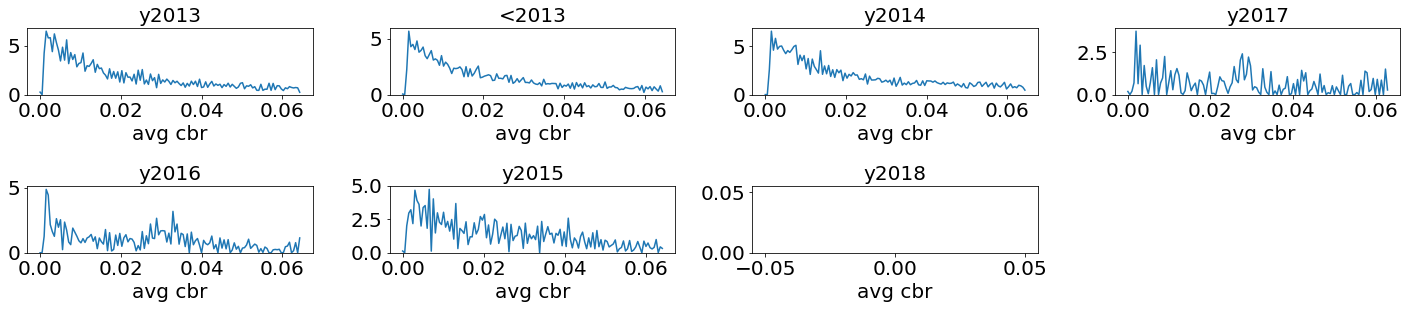

In [69]:
unique_yr = data["yr_ptdtn"].unique()
plt.figure(figsize=(20, 15))

for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(7, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["yr_ptdtn"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

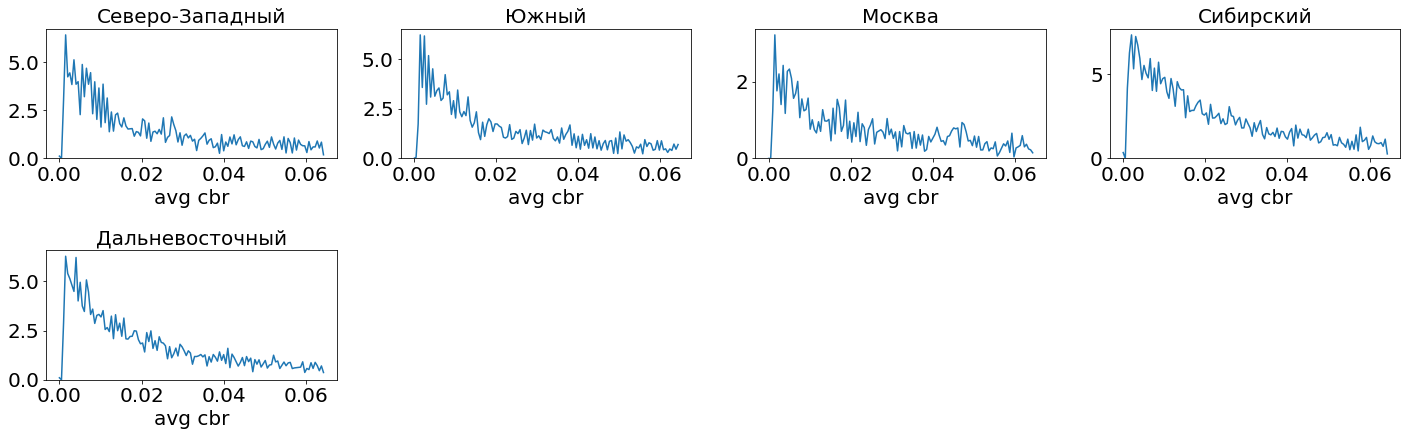

In [70]:
unique_yr = data["macroregion"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["macroregion"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

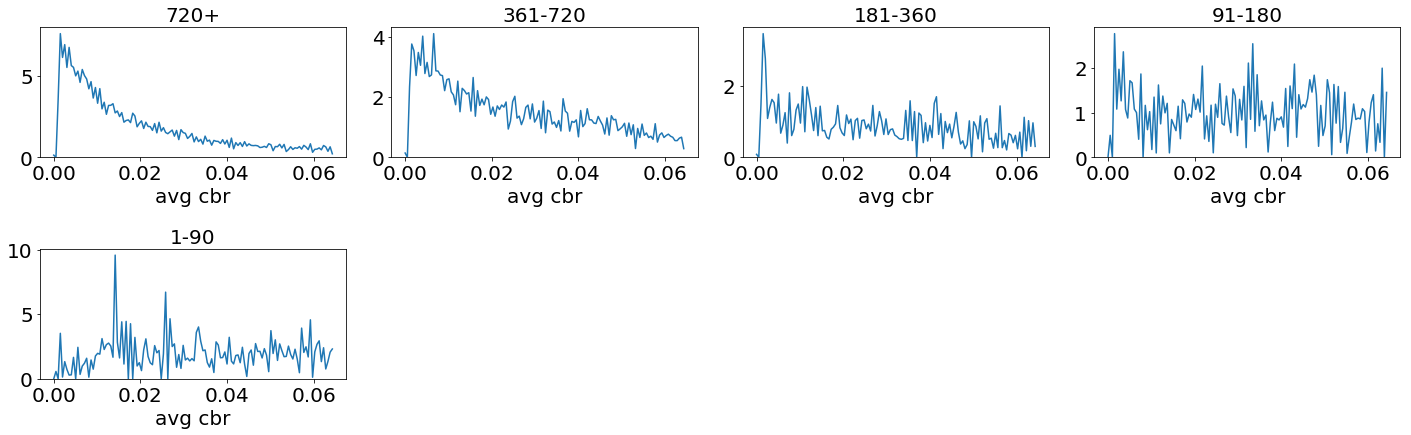

In [71]:
unique_yr = data["bucket"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["bucket"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


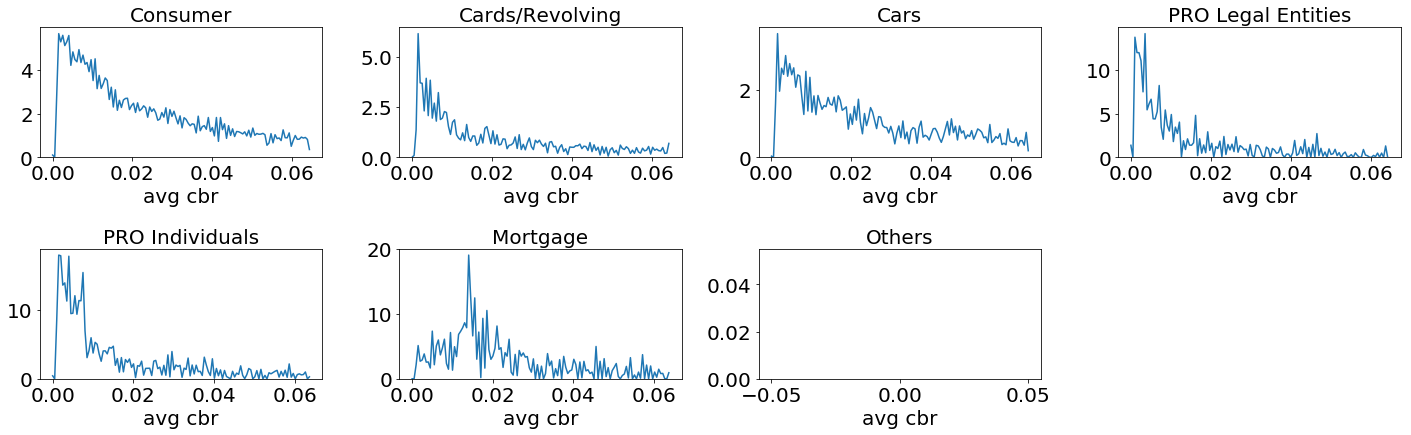

In [72]:
unique_yr = data["prod_type"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["prod_type"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

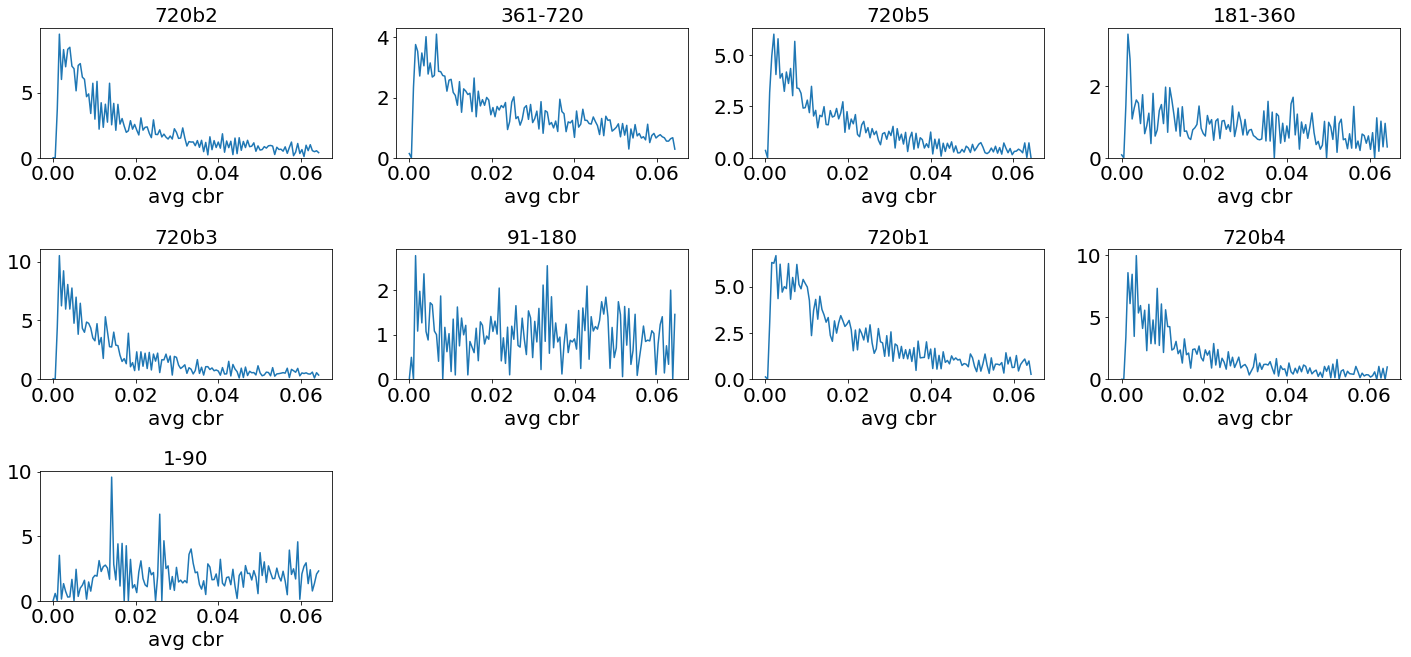

In [73]:
unique_yr = data["b720"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["b720"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

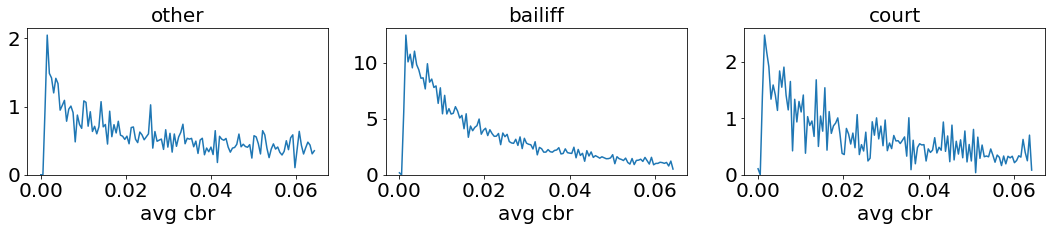

In [74]:
unique_yr = data["bailiff"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["bailiff"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: num must be 1 <= num <= 20, not 21

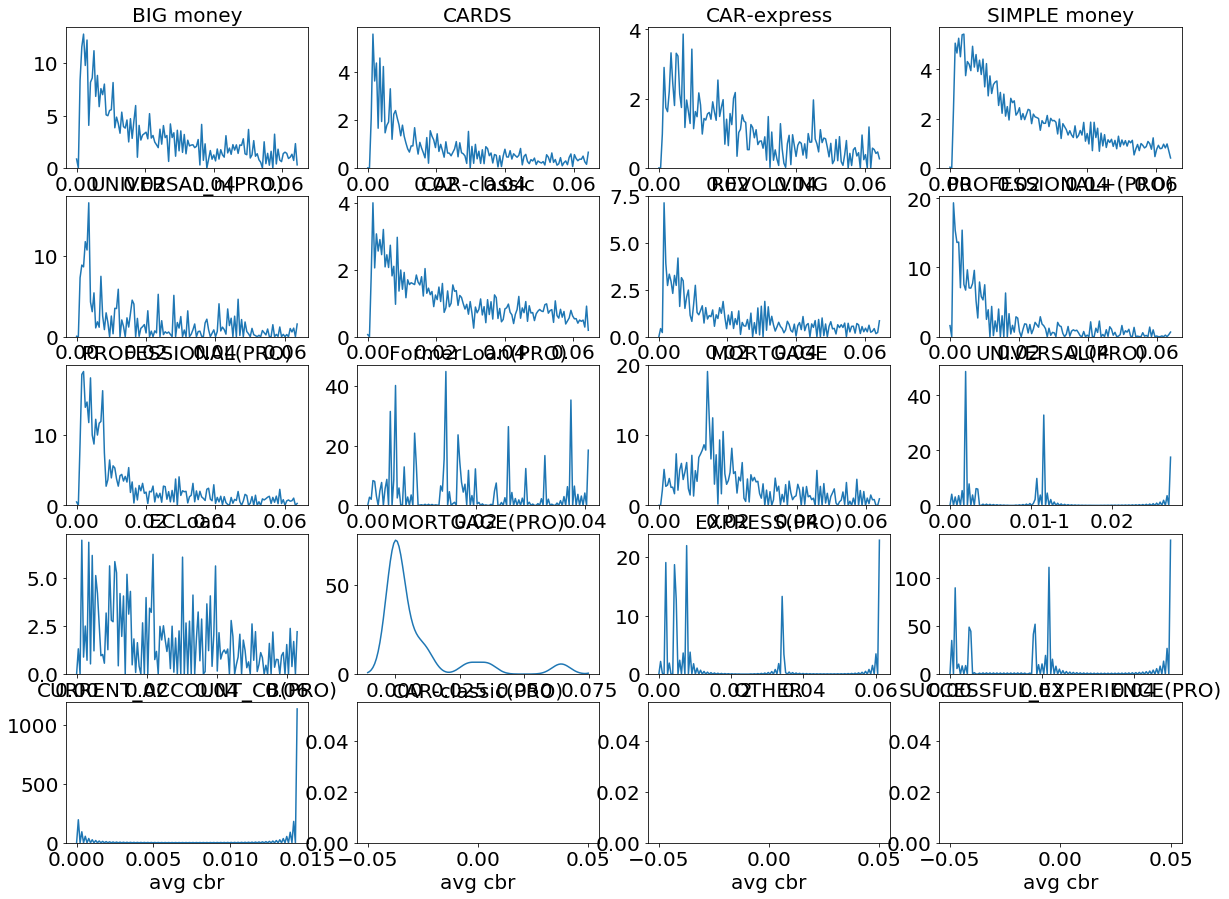

In [75]:
unique_yr = data["product_eng8"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["product_eng8"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

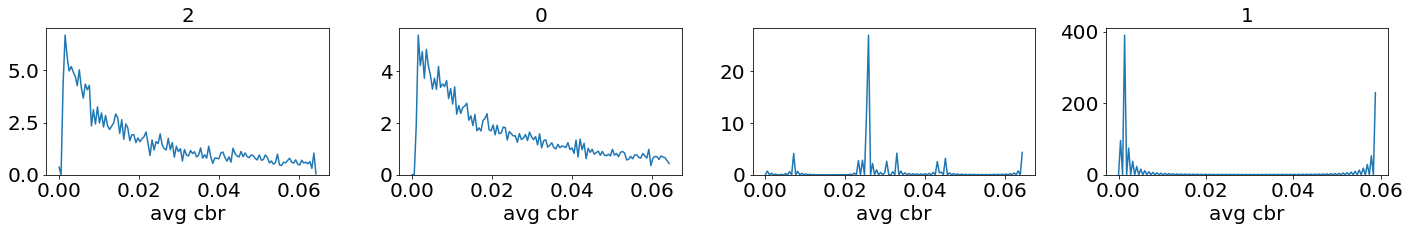

In [76]:
unique_yr = data["COLLATERAL"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["COLLATERAL"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: num must be 1 <= num <= 20, not 21

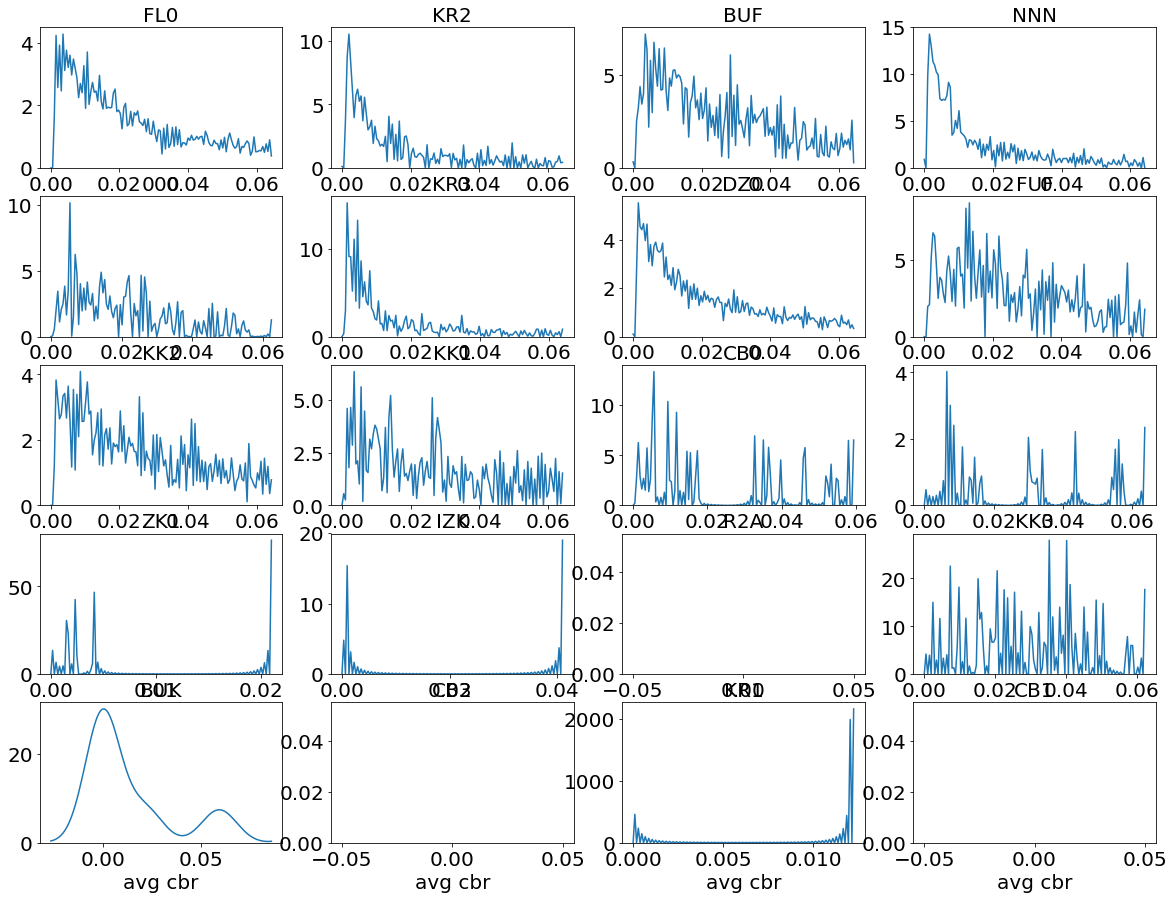

In [77]:
unique_yr = data["ptusr17"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["ptusr17"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

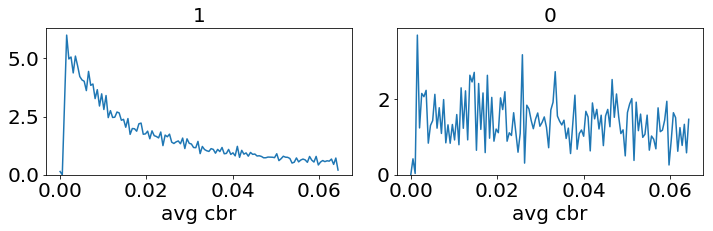

In [78]:
unique_yr = data["is_over"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["is_over"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


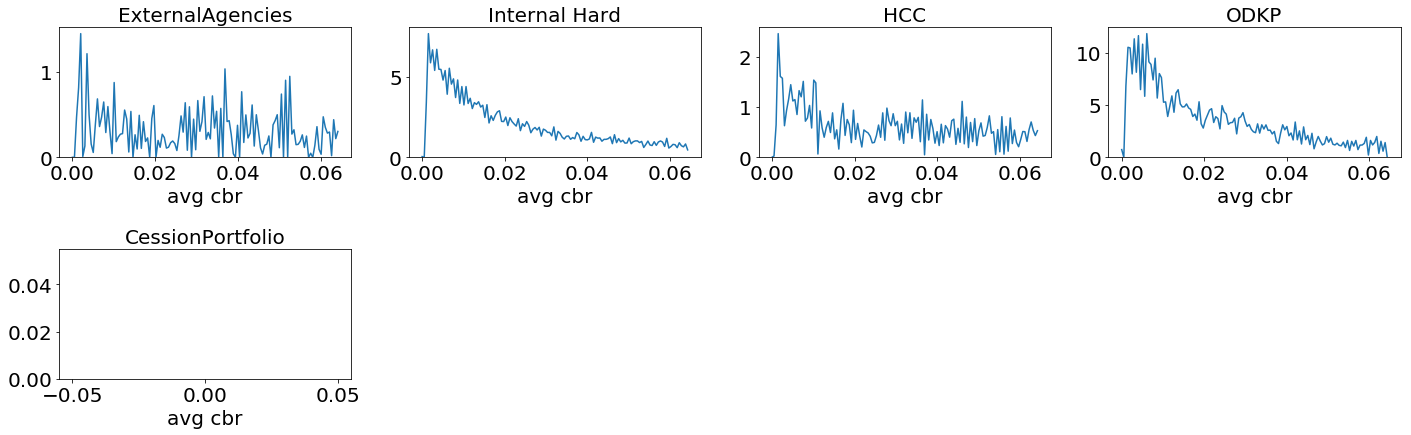

In [79]:
unique_yr = data["ar_agent_group_name"].unique()
plt.figure(figsize=(20, 15))



for idx, curr_genre in enumerate(unique_yr):
    plt.subplot(5, 4, idx+1)
    plt.title(curr_genre)
    sns.distplot(data[data["ar_agent_group_name"]==curr_genre]['cbr'], bins=22, hist=False)
    plt.xlabel('avg cbr')

plt.tight_layout();